In [1]:
import pandas as pd
from tqdm import tqdm
import networkx as nx
from bs4 import BeautifulSoup
import seaborn as sns
import numpy as np
import pickle as pkl

# Preprocessing

In [2]:
df = pd.read_pickle("metadata.pkl")

In [9]:
df["title"] = df["title"].apply(lambda x: BeautifulSoup(str(x).lower(), "lxml").text)

/tmp/ipykernel_5802/3788218982.py:1: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df["title"] = df["title"].apply(lambda x: BeautifulSoup(str(x).lower(), "lxml").text)


In [10]:
df["abstract"] = df["abstract"].apply(lambda x: BeautifulSoup(str(x).lower(), "lxml").text)

/tmp/ipykernel_5802/4135695934.py:1: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df["abstract"] = df["abstract"].apply(lambda x: BeautifulSoup(str(x).lower(), "lxml").text)


In [31]:
repeated_titles = (df["title"].value_counts() > 1).to_frame()
repeated_titles = list(repeated_titles[repeated_titles["count"]].reset_index(drop=False)["title"].values)
repeated_titles

['nan',
 'erratum',
 'errata',
 'preface',
 'introduction',
 'editorial',
 'discussion',
 'foreword',
 'advances in chemical physics',
 'quantum mechanics',
 'planck2015 results',
 'article',
 'planckintermediate results',
 'front cover',
 'atomic data from the iron project',
 'general discussion',
 'superconductivity',
 'quasicrystals',
 'the amateur scientist',
 'addendum',
 'dielectronic recombination data for dynamic finite-density plasmas',
 'liquid crystals',
 'carbon nanotubes',
 'corrigendum',
 'partial differential equations',
 'theory of superconductivity',
 'correspondence',
 'editorial: promoting inclusive and respectful communications',
 'stochastic differential equations',
 'erratum notice',
 'quantum field theory',
 'table of contents',
 'review of particle properties',
 'studies in protein metabolism',
 'mathematical games',
 'quantum computing',
 'double beta decay',
 'full length article',
 'statistical mechanics',
 'the vimos public extragalactic redshift survey (vip

In [32]:
len(repeated_titles)

16858

In [33]:
repeated_dois = (df["doi"].value_counts() > 1).to_frame()
repeated_dois = list(repeated_dois[repeated_dois["count"]].reset_index(drop=False)["doi"].values)
repeated_dois

['https://doi.org/10.1126/science',
 'https://doi.org/10.1103/physreva.41.5243',
 'https://doi.org/10.1051/0004-6361/201322780',
 'https://doi.org/10.1103/physrevlett.72.1572',
 'https://doi.org/10.1103/physreva.51.3534',
 'https://doi.org/10.1051/0004-6361/201015844',
 'https://doi.org/10.1103/physrevlett.97.202003',
 'https://doi.org/10.1051/0004-6361/201219398',
 'https://doi.org/10.1242/jeb.47.2.267',
 'https://doi.org/10.1103/physrevb.49.13075',
 'https://doi.org/10.1093/bioinformatics/btr602',
 'https://doi.org/10.1242/jeb.199.1.129',
 'https://doi.org/10.12942/lrr-2003-4',
 'https://doi.org/10.1103/physreva.42.5763',
 'https://doi.org/10.1051/0004-6361/201425301',
 'https://doi.org/10.1051/0004-6361/200913565',
 'https://doi.org/10.1103/physreva.73.063622',
 'https://doi.org/10.1038/nmat2325',
 'https://doi.org/10.1103/physrevb.44.5299',
 'https://doi.org/10.1016/j.nuclphysbps.2011.06.021',
 'https://doi.org/10.1103/physrevd.92.055004',
 'https://doi.org/10.1086/307363',
 'https

In [34]:
df = df[~df["title"].isin(repeated_titles)]
df = df[~df["doi"].isin(repeated_dois)].reset_index(drop=True)

In [4]:
df["high_confidence_concept"] = df["concepts"].apply(lambda x: (eval(x)[0][1] > 0.95) if isinstance(x, str) else False)

In [9]:
df = df[(df["abstract"].notna()) & (df["title"].notna()) & (df["referenced_works_count"].notna())]

In [21]:
df["referenced_works_count"] = pd.to_numeric(df["referenced_works_count"], errors="coerce")

In [22]:
df = df[(df["abstract"].notna()) & (df["title"].notna()) & (df["referenced_works_count"].notna())]

In [23]:
df = df[df["referenced_works_count"].astype(int) > 0]

In [27]:
df["referenced_works_count"] = df["referenced_works_count"].astype("int32")

In [32]:
#df.to_pickle("metadata_full_filtered.pkl", compression={'method': 'gzip', 'compresslevel': 3, 'mtime': 1})

In [34]:
df

,doi,id,abstract,title,publication_date,type,type_crossref,keywords,first_author,all_authors,all_authors_af,language,referenced_works,referenced_works_count,related_works,concepts,is_accepted,is_published,high_confidence_concept
0,https://doi.org/10.1103/physrevlett.26.192,https://openalex.org/W2050313003,tunneling measurements on junctions between ve...,spin-dependent tunneling into ferromagnetic ni...,1971-01-25,article,journal-article,"['nickel', 'spin-dependent']",P. M. Tedrow,"['P. M. Tedrow', 'R. Meservey']","['Francis Bitter National Magnet Laboratory, M...",en,"['https://openalex.org/W1966010108', 'https://...",12,"['https://openalex.org/W1998765608', 'https://...","[('Condensed matter physics', 0.8544545), ('Qu...",False,False,False
1,https://doi.org/10.1103/physreve.92.012819,https://openalex.org/W1758342214,inspired by the fact that people have diverse ...,competition and cooperation among different pu...,2015-07-27,article,journal-article,"['different punishing strategies', 'competitio...",Xiaojie Chen,"['Xiaojie Chen', 'Attila Szolnoki', 'Matjaž Pe...","['School of Mathematical Sciences, University ...",en,"['https://openalex.org/W748497126', 'https://o...",43,"['https://openalex.org/W2996115615', 'https://...","[('Public goods game', 0.79590267), ('Competit...",False,False,False
2,https://doi.org/10.1103/physrev.123.968,https://openalex.org/W2040287172,the scattering matrix for compound nucleus pro...,theory of average neutron reaction cross secti...,1961-08-01,article,journal-article,"['cross sections', 'resonance']",P.A. Moldauer,['P.A. Moldauer'],"['Argonne National Laboratory, Argonne, Illino...",en,"['https://openalex.org/W1965366397', 'https://...",19,"['https://openalex.org/W2063585241', 'https://...","[('Physics', 0.75732374), ('Resonance (particl...",False,False,False
3,https://doi.org/10.1103/physrevlett.86.4536,https://openalex.org/W1973501299,"the instability, dynamics, and morphological t...",templating of thin films induced by dewetting ...,2001-05-14,article,journal-article,"['thin films', 'surfaces']",Kajari Kargupta,"['Kajari Kargupta', 'Ashutosh Sharma']","['Department of Chemical Engineering, Indian I...",en,"['https://openalex.org/W1514074674', 'https://...",23,"['https://openalex.org/W2236704256', 'https://...","[('Dewetting', 0.96603024), ('Instability', 0....",False,False,True
4,https://doi.org/10.1103/physrevlett.105.235502,https://openalex.org/W1535924615,the energy of arbitrary graphene edge is deriv...,graphene edge from armchair to zigzag: the ori...,2010-12-03,article,journal-article,"['nanotube chirality', 'graphene', 'edge']",Yuanyue Liu,"['Yuanyue Liu', 'Alex Dobrinsky', 'Boris I. Ya...",['Department of Mechanical Engineering & Mater...,en,"['https://openalex.org/W1992192511', 'https://...",25,"['https://openalex.org/W2318938206', 'https://...","[('Zigzag', 0.89218235), ('Graphene', 0.879921...",False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2059783,https://doi.org/10.1016/s0921-4526(99)02691-5,https://openalex.org/W2045889366,few genuine organic bulk-ferromagnets have bee...,pressure-induced enhancement of tc in a genuin...,2000-07-01,article,journal-article,"['tc', 'pressure-induced', 'bulk-ferromagnet']",M Mito,"['M Mito', 'T Kawae', 'A Ikegami', 'M Hitaka',...","['Faculty of Engineering, Kyushu University, H...",en,"['https://openalex.org/W1972185364', 'https://...",6,"['https://openalex.org/W1802184100', 'https://...","[('Ferromagnetism', 0.9173384), ('Antiferromag...",False,False,False
2059784,https://doi.org/10.1159/000077866,https://openalex.org/W2077739444,flagella are extremely effective organelles of...,dual flagellar systems enable motility under d...,2004-01-01,article,journal-article,"['motility', 'systems']",Linda L. McCarter,['Linda L. McCarter'],"['Department of Microbiology, The University o...",en,"['https://openalex.org/W1978139448', 'https://...",7,"['https://openalex.org/W2160068301', 'https://...","[('Flagell

In [2]:
df = pd.read_pickle("metadata_full_filtered.pkl")

# EDA

<Axes: xlabel='publication_date'>

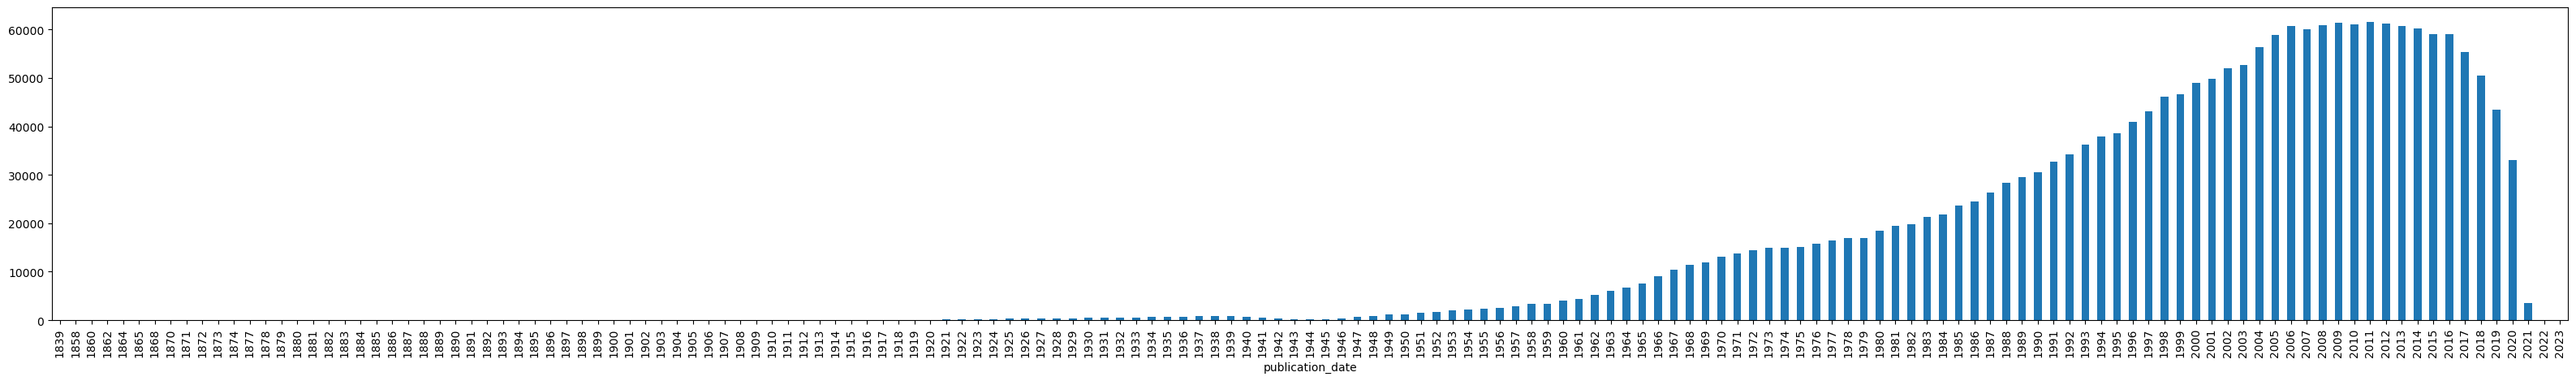

In [3]:
df["publication_date"].apply(lambda x: x[:4]).value_counts().sort_index().plot.bar(figsize=(40,5))

In [4]:
len(df[df["high_confidence_concept"]]) / len(df)

0.07843234352273147

/home/vmachado/anaconda3/envs/dl_ds_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vmachado/anaconda3/envs/dl_ds_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0.5, 0, 'Log scale Node degree'),
 Text(0, 0.5, 'Log scale count of Nodes')]

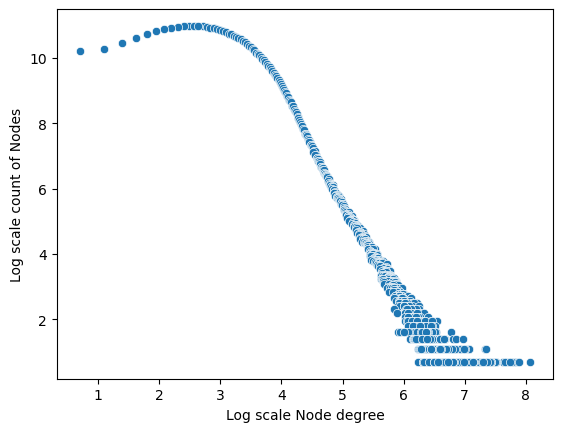

In [26]:
count = df["referenced_works_count"].value_counts().to_dict()
#display(count)
ax = sns.scatterplot(x=np.log1p(np.array(list(count.keys()))), y=np.log1p(np.array(list(count.values()))))
ax.set(xlabel="Log scale Node degree", ylabel="Log scale count of Nodes")
#sns.set_xaxis_title("ss")

In [8]:
100 * df["language"].value_counts() / len(df)

language
en       99.462032
fr        0.292117
de        0.217255
it        0.003398
es        0.003107
ro        0.002573
ca        0.001893
ru        0.001602
pt        0.001359
et        0.000631
sv        0.000583
uk        0.000583
ja        0.000583
no        0.000534
tl        0.000388
vi        0.000340
nl        0.000340
da        0.000291
so        0.000243
cy        0.000243
af        0.000194
tr        0.000146
hu        0.000097
ko        0.000097
hr        0.000097
zh-cn     0.000049
pl        0.000049
sl        0.000049
id        0.000049
Name: count, dtype: float64

In [3]:
df

,doi,id,abstract,title,publication_date,type,type_crossref,keywords,first_author,all_authors,all_authors_af,language,referenced_works,referenced_works_count,related_works,concepts,is_accepted,is_published,high_confidence_concept
0,https://doi.org/10.1103/physrevlett.26.192,https://openalex.org/W2050313003,tunneling measurements on junctions between ve...,spin-dependent tunneling into ferromagnetic ni...,1971-01-25,article,journal-article,"['nickel', 'spin-dependent']",P. M. Tedrow,"['P. M. Tedrow', 'R. Meservey']","['Francis Bitter National Magnet Laboratory, M...",en,"['https://openalex.org/W1966010108', 'https://...",12,"['https://openalex.org/W1998765608', 'https://...","[('Condensed matter physics', 0.8544545), ('Qu...",False,False,False
1,https://doi.org/10.1103/physreve.92.012819,https://openalex.org/W1758342214,inspired by the fact that people have diverse ...,competition and cooperation among different pu...,2015-07-27,article,journal-article,"['different punishing strategies', 'competitio...",Xiaojie Chen,"['Xiaojie Chen', 'Attila Szolnoki', 'Matjaž Pe...","['School of Mathematical Sciences, University ...",en,"['https://openalex.org/W748497126', 'https://o...",43,"['https://openalex.org/W2996115615', 'https://...","[('Public goods game', 0.79590267), ('Competit...",False,False,False
2,https://doi.org/10.1103/physrev.123.968,https://openalex.org/W2040287172,the scattering matrix for compound nucleus pro...,theory of average neutron reaction cross secti...,1961-08-01,article,journal-article,"['cross sections', 'resonance']",P.A. Moldauer,['P.A. Moldauer'],"['Argonne National Laboratory, Argonne, Illino...",en,"['https://openalex.org/W1965366397', 'https://...",19,"['https://openalex.org/W2063585241', 'https://...","[('Physics', 0.75732374), ('Resonance (particl...",False,False,False
3,https://doi.org/10.1103/physrevlett.86.4536,https://openalex.org/W1973501299,"the instability, dynamics, and morphological t...",templating of thin films induced by dewetting ...,2001-05-14,article,journal-article,"['thin films', 'surfaces']",Kajari Kargupta,"['Kajari Kargupta', 'Ashutosh Sharma']","['Department of Chemical Engineering, Indian I...",en,"['https://openalex.org/W1514074674', 'https://...",23,"['https://openalex.org/W2236704256', 'https://...","[('Dewetting', 0.96603024), ('Instability', 0....",False,False,True
4,https://doi.org/10.1103/physrevlett.105.235502,https://openalex.org/W1535924615,the energy of arbitrary graphene edge is deriv...,graphene edge from armchair to zigzag: the ori...,2010-12-03,article,journal-article,"['nanotube chirality', 'graphene', 'edge']",Yuanyue Liu,"['Yuanyue Liu', 'Alex Dobrinsky', 'Boris I. Ya...",['Department of Mechanical Engineering & Mater...,en,"['https://openalex.org/W1992192511', 'https://...",25,"['https://openalex.org/W2318938206', 'https://...","[('Zigzag', 0.89218235), ('Graphene', 0.879921...",False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2059783,https://doi.org/10.1016/s0921-4526(99)02691-5,https://openalex.org/W2045889366,few genuine organic bulk-ferromagnets have bee...,pressure-induced enhancement of tc in a genuin...,2000-07-01,article,journal-article,"['tc', 'pressure-induced', 'bulk-ferromagnet']",M Mito,"['M Mito', 'T Kawae', 'A Ikegami', 'M Hitaka',...","['Faculty of Engineering, Kyushu University, H...",en,"['https://openalex.org/W1972185364', 'https://...",6,"['https://openalex.org/W1802184100', 'https://...","[('Ferromagnetism', 0.9173384), ('Antiferromag...",False,False,False
2059784,https://doi.org/10.1159/000077866,https://openalex.org/W2077739444,flagella are extremely effective organelles of...,dual flagellar systems enable motility under d...,2004-01-01,article,journal-article,"['motility', 'systems']",Linda L. McCarter,['Linda L. McCarter'],"['Department of Microbiology, The University o...",en,"['https://openalex.org/W1978139448', 'https://...",7,"['https://openalex.org/W2160068301', 'https://...","[('Flagell

In [6]:
from typing import List

network = {}
degrees = []
df_en = df[df["language"] == "en"].reset_index(drop=True) 
all_nodes = set(df_en["id"].tolist())
for _, x in df_en.iterrows():
    id = x["id"]
    ref = x["referenced_works"]
    if isinstance(ref, str):
        ev = eval(ref)
        if isinstance(ev, List) and len(ev) > 0:
            network[id] = set(ev).intersection(all_nodes)
            degrees.append((id, len(network[id])))
            
df = df[df["id"].isin(list(network.keys()))].reset_index(drop=True) 

In [7]:
len(network.keys())

2048707

In [10]:
df = df.drop(columns=["doi", "type", "type_crossref", "first_author", "all_authors", "all_authors_af", "language", "referenced_works", "referenced_works_count", "related_works", "is_accepted", "is_published", "high_confidence_concept"])

In [14]:
df.to_pickle("df_en_minimal.pkl")

In [15]:
pkl.dump(network, open("network_filtered.pkl", "wb"))

In [2]:
df = pd.read_pickle("df_en_minimal.pkl")

In [3]:
df

,id,abstract,title,publication_date,keywords,concepts
0,https://openalex.org/W2050313003,tunneling measurements on junctions between ve...,spin-dependent tunneling into ferromagnetic ni...,1971-01-25,"['nickel', 'spin-dependent']","[('Condensed matter physics', 0.8544545), ('Qu..."
1,https://openalex.org/W1758342214,inspired by the fact that people have diverse ...,competition and cooperation among different pu...,2015-07-27,"['different punishing strategies', 'competitio...","[('Public goods game', 0.79590267), ('Competit..."
2,https://openalex.org/W2040287172,the scattering matrix for compound nucleus pro...,theory of average neutron reaction cross secti...,1961-08-01,"['cross sections', 'resonance']","[('Physics', 0.75732374), ('Resonance (particl..."
3,https://openalex.org/W1973501299,"the instability, dynamics, and morphological t...",templating of thin films induced by dewetting ...,2001-05-14,"['thin films', 'surfaces']","[('Dewetting', 0.96603024), ('Instability', 0...."
4,https://openalex.org/W1535924615,the energy of arbitrary graphene edge is deriv...,graphene edge from armchair to zigzag: the ori...,2010-12-03,"['nanotube chirality', 'graphene', 'edge']","[('Zigzag', 0.89218235), ('Graphene', 0.879921..."
...,...,...,...,...,...,...
2048702,https://openalex.org/W2045889366,few genuine organic bulk-ferromagnets have bee...,pressure-induced enhancement of tc in a genuin...,2000-07-01,"['tc', 'pressure-induced', 'bulk-ferromagnet']","[('Ferromagnetism', 0.9173384), ('Antiferromag..."
2048703,https://openalex.org/W2077739444,flagella are extremely effective organelles of...,dual flagellar systems enable motility under d...,2004-01-01,"['motility', 'systems']","[('Flagellum', 0.9636199), ('Cell biology', 0...."
2048704,https://openalex.org/W2051978307,we observed that high-power pulsed magnetron p...,instabilities in high-power impulse magnetron ...,2013-02-01,"['stochasticity', 'high-power']","[('Impulse (physics)', 0.7184582), ('Plasma', ..."
2048705,https://openalex.org/W2068379212,the specific mass shift contribution to the is...,many-body calculations of atomic isotope shifts,1985-09-14,"['shifts', 'many-body']","[('Atomic physics', 0.63052225), ('Isotope', 0..."


In [4]:
network = pkl.load(open("network_filtered.pkl", "rb"))

/home/vmachado/anaconda3/envs/dl_ds_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vmachado/anaconda3/envs/dl_ds_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0.5, 0, 'Log scale Node degree'),
 Text(0, 0.5, 'Log scale count of Nodes')]

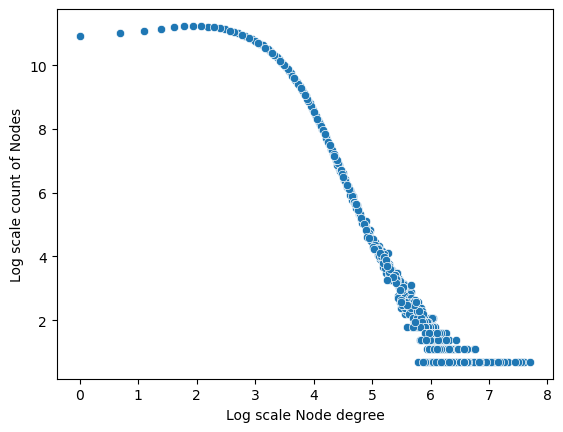

In [7]:
from collections import Counter
degrees = [len(v) for k,v in network.items()]
counts = Counter(degrees)

#display(count)
ax = sns.scatterplot(x=np.log1p(np.array(list(counts.keys()))), y=np.log1p(np.array(list(counts.values()))))
ax.set(xlabel="Log scale Node degree", ylabel="Log scale count of Nodes")
#plt.show()

In [8]:
g = nx.Graph(network)

In [12]:
network

{'https://openalex.org/W2050313003': {'https://openalex.org/W1966010108',
  'https://openalex.org/W1969703606',
  'https://openalex.org/W1982956922',
  'https://openalex.org/W1992619391',
  'https://openalex.org/W1994212145',
  'https://openalex.org/W2003536820',
  'https://openalex.org/W2021885362',
  'https://openalex.org/W2061726937',
  'https://openalex.org/W2064935515',
  'https://openalex.org/W2067175510',
  'https://openalex.org/W2082558391'},
 'https://openalex.org/W1758342214': {'https://openalex.org/W1547239602',
  'https://openalex.org/W1592901917',
  'https://openalex.org/W1975011335',
  'https://openalex.org/W1985340978',
  'https://openalex.org/W1992195122',
  'https://openalex.org/W1995714727',
  'https://openalex.org/W2009111852',
  'https://openalex.org/W2012615693',
  'https://openalex.org/W2026230959',
  'https://openalex.org/W2032140405',
  'https://openalex.org/W2044185750',
  'https://openalex.org/W2045134910',
  'https://openalex.org/W2054446781',
  'https://open

In [20]:
df = df.sort_values("id").reset_index(drop=True) #.set_index("id") #.loc['https://openalex.org/W2050313003']
df

,id,abstract,title,publication_date,keywords,concepts
0,https://openalex.org/W100001730,the raman spectra of the parent compound naxco...,raman spectroscopy study ofnaxcoo2and supercon...,2004-08-10,"['raman spectroscopy', 'spectroscopy study']","[('Raman spectroscopy', 0.89063823), ('Superco..."
1,https://openalex.org/W1000042173,publisher summary this chapter discusses the s...,chapter 1: vortices in rotating superfluid3he,1986-01-01,"['superfluid3he', 'vortices']","[('Vortex', 0.7865634), ('Physics', 0.376391),..."
2,https://openalex.org/W100006313,in a wire spark-chamber experiment the squared...,experimental study on the τ± decay matrix element,1972-03-01,['matrix'],"[('Physics', 0.9268166), ('Matrix element', 0...."
3,https://openalex.org/W1000096099,"using angle-resolved photoemission, we have ma...",fermi surface and electronic structure ofnd2−xce,1993-05-17,"['fermi surface', 'electronic structure']","[('Fermi surface', 0.59463906), ('Physics', 0...."
4,https://openalex.org/W1000312985,we demonstrate controlled manipulation of larg...,microparticle manipulation using inertial forces,2006-02-27,"['forces', 'manipulation']","[('Particle (ecology)', 0.62976944), ('Micropa..."
...,...,...,...,...,...,...
2048702,https://openalex.org/W999422512,a mostly single bcc phase with nanoscale grain...,high saturation magnetization and soft magneti...,1991-01-01,"['soft magnetic properties', 'high saturation ...","[('Materials science', 0.725253), ('Amorphous ..."
2048703,https://openalex.org/W999575332,publisher summary this chapter discusses a phe...,chapter 1 protein-lipid interactions and membr...,1993-01-01,"['membrane heterogeneity', 'protein-lipid']","[('Chemistry', 0.4417297), ('Biology', 0.38962..."
2048704,https://openalex.org/W99994197,measurements are reported of the transmission ...,infrared optical excitations inla2nio4,1995-10-01,['infrared optical excitations'],"[('Physics', 0.62062633), ('Absorption (acoust..."
2048705,https://openalex.org/W999961912,this chapter reviews the computational methods...,energies and asymptotic analysis for helium ry...,1993-01-01,['asymptotic analysis'],"[('Physics', 0.88181573), ('Rydberg formula', ..."


In [60]:
df.to_pickle("df_en_sorted_minimal.pkl")

In [21]:
H = nx.Graph()
H.add_nodes_from(sorted(g.nodes(data=True)))
H.add_edges_from(g.edges(data=True))

In [22]:
from torch_geometric.utils.convert import to_networkx, from_networkx

dataset = from_networkx(H)

In [58]:
import torch

torch.save(dataset, "torch_geometric_ds.bin")
#dataset = torch.load("torch_geometric_ds.bin")

In [27]:
import gc; gc.enable();
gc.collect()

4097306

In [72]:
sorted(dataset.edge_index[:, :33].flatten().unique().numpy())

[0,
 4772,
 26011,
 52136,
 53530,
 54439,
 69186,
 145698,
 162891,
 178737,
 210780,
 216196,
 285184,
 302150,
 314039,
 337557,
 366534,
 395137,
 419511,
 452423,
 495550,
 609233,
 622319,
 789659,
 797884,
 823743,
 864480,
 1292813,
 1299703,
 1523700,
 1867678,
 1889334,
 1958844,
 2006969]

In [42]:
network["https://openalex.org/W100001730"]

{'https://openalex.org/W1664331607',
 'https://openalex.org/W1853787478',
 'https://openalex.org/W1976257635',
 'https://openalex.org/W1985213701',
 'https://openalex.org/W1988657733',
 'https://openalex.org/W2004246665',
 'https://openalex.org/W2016782453',
 'https://openalex.org/W2036732517',
 'https://openalex.org/W2040763157',
 'https://openalex.org/W2083317673',
 'https://openalex.org/W2135304848',
 'https://openalex.org/W3101361218',
 'https://openalex.org/W3105986726'}

In [64]:
network["https://openalex.org/W100001730"].intersection(set(df.iloc[[ 314039,  145698,  452423, 1889334,   53530,   54439,   69186,  162891,
          216196,   26011,   52136, 1958844, 1523700, 1292813,  495550,  337557,
          864480,  210780,  823743,  622319, 2006969,  302150,  789659, 1867678,
          609233,  797884,    4772,  285184,  178737,  395137,  366534, 1299703,
          419511]]["id"].values)) #== network["https://openalex.org/W100001730"]

{'https://openalex.org/W1664331607',
 'https://openalex.org/W1853787478',
 'https://openalex.org/W1976257635',
 'https://openalex.org/W1985213701',
 'https://openalex.org/W1988657733',
 'https://openalex.org/W2004246665',
 'https://openalex.org/W2016782453',
 'https://openalex.org/W2036732517',
 'https://openalex.org/W2040763157',
 'https://openalex.org/W2083317673',
 'https://openalex.org/W2135304848',
 'https://openalex.org/W3101361218',
 'https://openalex.org/W3105986726'}

In [73]:
idx_node_0 = [0,
 4772,
 26011,
 52136,
 53530,
 54439,
 69186,
 145698,
 162891,
 178737,
 210780,
 216196,
 285184,
 302150,
 314039,
 337557,
 366534,
 395137,
 419511,
 452423,
 495550,
 609233,
 622319,
 789659,
 797884,
 823743,
 864480,
 1292813,
 1299703,
 1523700,
 1867678,
 1889334,
 1958844,
 2006969]

df.iloc[idx_node_0] #["abstract"]

,id,abstract,title,publication_date,keywords,concepts
0,https://openalex.org/W100001730,the raman spectra of the parent compound naxco...,raman spectroscopy study ofnaxcoo2and supercon...,2004-08-10,"['raman spectroscopy', 'spectroscopy study']","[('Raman spectroscopy', 0.89063823), ('Superco..."
4772,https://openalex.org/W1480856082,raman scattering experiments have been perform...,phonon scattering and stability of,2005-04-01,['stability'],"[('Instability', 0.8351197), ('Raman scatterin..."
26011,https://openalex.org/W1556841081,raman spectroscopy measurements have been perf...,"raman spectroscopy study ofα-,β-,γ−naxco",2006-09-14,"['spectroscopy study', 'raman']","[('Raman spectroscopy', 0.7850114), ('Physics'..."
52136,https://openalex.org/W1658555192,two series of alpha and beta-naxcoo2 material...,"superconductivity, charge ordering, and struct...",2006-03-09,['charge ordering'],"[('Monoclinic crystal system', 0.73500574), ('..."
53530,https://openalex.org/W1664331607,superconducting and nonsuperconducting phases ...,electron-phonon coupling in superconductingba0...,1989-08-01,"['raman', 'electron-phonon']","[('Superconductivity', 0.634346), ('Physics', ..."
54439,https://openalex.org/W1668155608,the effect of surface degradation of the therm...,comment on “raman spectroscopy study ofnaxcoo2...,2007-03-23,"['raman', 'spectroscopy study', 'of<mmlmath xm...","[('Raman spectroscopy', 0.7576895), ('Physics'..."
69186,https://openalex.org/W1853787478,poly- and single-crystalline naxcoo2 has been ...,observation of bulk superconductivity innaxcoo2·y,2003-11-21,['bulk superconductivity'],"[('Electrical resistivity and conductivity', 0..."
145698,https://openalex.org/W1969844469,"in superconductors on triangle lattices, we sh...",electronic raman scattering in superconductors...,2006-03-22,"['superconductors', 'triangular lattices', 'sc...","[('Pairing', 0.89655006), ('Superconductivity'..."
162891,https://openalex.org/W1971535046,the electronic band structures of the parent c...,influence of water concentration on the electr...,2006-03-31,"['local spin density approximation', 'electron...","[('Valence (chemistry)', 0.5631424), ('Electro..."
178737,https://openalex.org/W1973102576,an intercalation compound with composition na0...,physicochemical properties of naxcoo2 as a cat...,2011-06-01,"['solid state sodium battery', 'naxcoo2', 'cat...","[('Cathode', 0.87498105), ('Electrochemistry',..."


In [9]:
from torch_geometric.utils.convert import from_networkx

In [ ]:
pyg_graph = from_networkx(g)

In [38]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
dataset.edge_index

tensor([[      0,       0,       0,  ..., 2048705, 2048706, 2048706],
        [ 210010, 1773292,  599393,  ...,  632916, 1864079, 1698366]])

In [44]:
loader = GraphSAINTNodeSampler(dataset, batch_size=16000,
                                     num_steps=2, sample_coverage=10,
                                     num_workers=12)




  0%|                                    | 0/20487070 [00:00<?, ?it/s]


Compute GraphSAINT normalization:   0%|  | 0/20487070 [00:00<?, ?it/s]


Compute GraphSAINT normalization:   0%| | 15844/20487070 [00:00<14:23,


Compute GraphSAINT normalization:   0%| | 47613/20487070 [00:01<10:32,


Compute GraphSAINT normalization:   0%| | 79348/20487070 [00:02<09:59,


Compute GraphSAINT normalization:   1%| | 111059/20487070 [00:03<09:37

Compute GraphSAINT normalization:   0%| | 3999/20487070 [00:25<19:16:3


Compute GraphSAINT normalization:   1%| | 142760/20487070 [00:04<09:30


Compute GraphSAINT normalization:   1%| | 174481/20487070 [00:04<09:22


Compute GraphSAINT normalization:   1%| | 206198/20487070 [00:05<09:10


Compute GraphSAINT normalization:   1%| | 237901/20487070 [00:06<09:11


Compute GraphSAINT normalization:   1%| | 269623/20487070 [00:07<09:12


Compute GraphSAINT normalization:   1%| | 301347/20487070 [00:08<09:13


Compute GraphSAINT normalization:   2%| | 333099/

RuntimeError: DataLoader worker (pid(s) 573842, 573854, 573866, 573881, 573893, 573905, 573917, 573929, 573941, 573953) exited unexpectedly




Compute GraphSAINT normalization:   2%| | 475865/20487070 [00:23<09:05

In [32]:
from torch_geometric.loader import DataLoader

loader_standard = DataLoader(dataset.edge_index.T, batch_size=1024)

In [33]:
loader_standard

In [47]:
for b in loader_standard:
    print(b.T[0])
    break

tensor([ 0,  0,  0,  ..., 39, 39, 39])


In [28]:
torch.__version__

'2.1.1'

In [35]:
torch.version.cuda

'12.1'

In [39]:
CUDA = "cu121"
!conda install pytorch-sparse -c pyg -y

Channels:
 - pyg
 - defaults
 - conda-forge
 - nvidia
 - pytorch
Platform: linux-64


In [30]:
dataset.is_directed()

True

In [21]:
dataset.edge_index[0]

tensor([      0,       0,       0,  ..., 2048705, 2048706, 2048706])

In [2]:
g = nx.read_adjlist("citation_net.nx")

In [7]:
import random
k = 10
sampled_nodes = random.sample(g.nodes, k)
sampled_graph = g.subgraph(sampled_nodes)

/tmp/ipykernel_76122/4193713747.py:3: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sampled_nodes = random.sample(g.nodes, k)


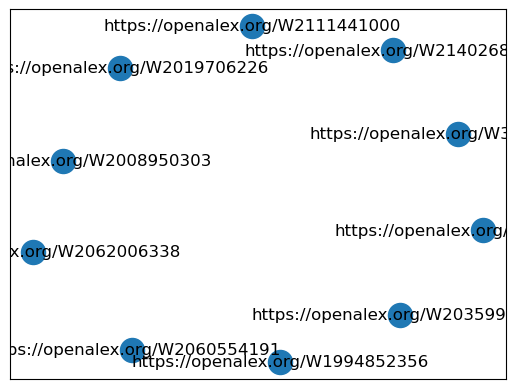

In [8]:
nx.draw_networkx(sampled_graph)

In [41]:
concepts_all = []
for c in concepts:
    concepts_all.extend([x[0] for x in c])

In [43]:
concepts_all = set(concepts_all)

In [45]:
concepts_all

{'Biological soil crust',
 'Data envelopment analysis',
 'Bombyx mori',
 'Desoxyribonucleic acid',
 'Retinol',
 'Cosmological perturbation theory',
 'Synthon',
 'Basis function',
 'Buffer strip',
 'Biexciton',
 'Chimeric antigen receptor',
 'Mammillary body',
 'Ligase chain reaction',
 'Transistor',
 'Prenatal development',
 'Quasi-Zenith Satellite System',
 'Cracking',
 'Sierra leone',
 'Karl popper',
 'Soil respiration',
 'Radio occultation',
 'Economic potential',
 'GLI2',
 'Photon',
 'Parallel metaheuristic',
 'Galactose',
 'Rotary encoder',
 'Congo red',
 'Dry land',
 'Infrared microscopy',
 'Disodium cromoglycate',
 'Psychosocial',
 'Protein adsorption',
 'Activities of daily living',
 'Intermembrane space',
 'Dielectric resonator',
 'Breaking wave',
 'Mercalli intensity scale',
 'Aminomethylphosphonic acid',
 'Chloride',
 'Thermal infrared',
 'Strength of a graph',
 'Pickering emulsion',
 'Event-related potential',
 'Cognitive reserve',
 'Thermal equilibrium',
 'Dynamin',
 'Bent

In [46]:
del concepts

In [65]:
import gc; gc.enable; gc.collect()

656